In [ ]:
#Full script cut

In [13]:
# block 1: import all important libraries
%matplotlib inline
from netCDF4 import Dataset
from netCDF4 import num2date
from matplotlib.pyplot import figure, pcolor, colorbar, xlabel, ylabel, title, draw, quiver, show
import numpy as np

In [14]:
# block 2: Import the used data file and create a variable with the data in the file
acorn_URL = "/media/z3525831/Transcend/UNSW/Data HF radar/output.nc"
acorn_DATA = Dataset(acorn_URL) 

In [ ]:
# block 3: Creation and conversion of date and time variables (number with classical date format)
units = acorn_DATA.variables['TIME'].units
calendar = acorn_DATA.variables['TIME'].calendar
times = num2date(acorn_DATA.variables['TIME'][:], units=units, calendar=calendar)

In [15]:
# block 4: Extracting the U/V/speed/lat/long/time data from the import file and assigns them to a variable
uData = acorn_DATA.variables['UCUR'][:,:,:] # 3 dimensions - t,x,y
vData = acorn_DATA.variables['VCUR'][:,:,:]
spData = (uData**2 + vData**2)**0.5 
LAT = acorn_DATA.variables['LATITUDE']
LON = acorn_DATA.variables['LONGITUDE']
TIME = acorn_DATA.variables['TIME']

In [16]:
# block 5: define new variables with lat, long, and speed data with the right shape for the plot
timeIndex = 4
speedData = spData[timeIndex,:,:]
latData = LAT[:]
lonData = LON[:]

In [17]:
# block 6: Creation of U, V variables according to UCUR and VCUR data and time
uData = acorn_DATA.variables['UCUR'][timeIndex,:,:]
vData = acorn_DATA.variables['VCUR'][timeIndex,:,:]
units = acorn_DATA.variables['UCUR'].units

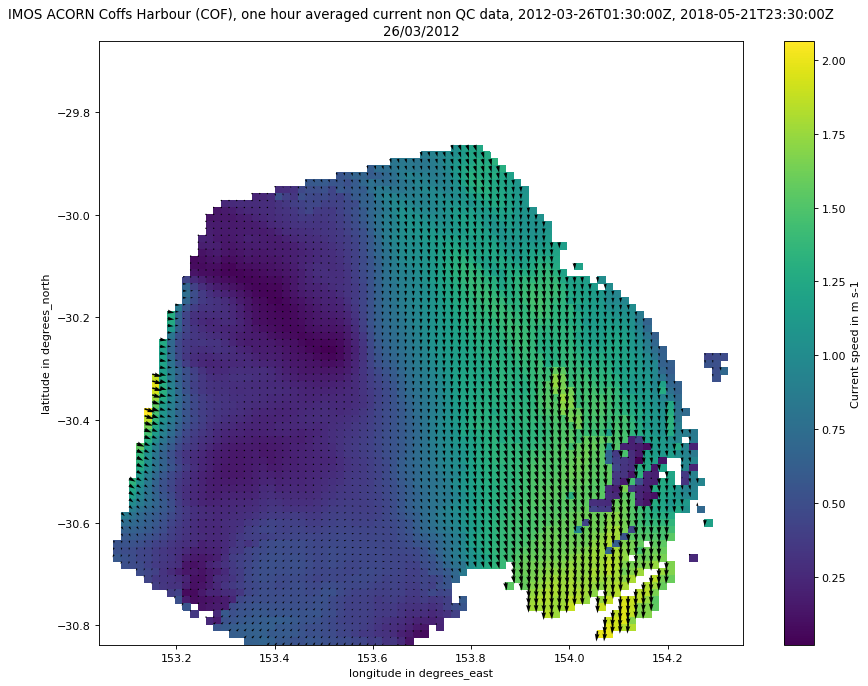

In [18]:
# block 7: Chart configuration:
#      - axis, color, size
#      - card background
#      - label and colorbar
#      - title
#      -plot of speed vector according to long, lat, U and V
figure1 = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
pcolor(lonData , latData, speedData) 
cbar = colorbar()
cbar.ax.set_ylabel('Current speed in ' + units)
title(acorn_DATA.title + '\n' + num2date(TIME[timeIndex], TIME.units, TIME.calendar).strftime('%d/%m/%Y'))
xlabel(LON.long_name + ' in ' + LON.units)
ylabel(LAT.long_name + ' in ' + LAT.units)

Q = quiver(lonData[:], latData[:], uData, vData, units='width')  
show()

In [4]:
#Full script not cut

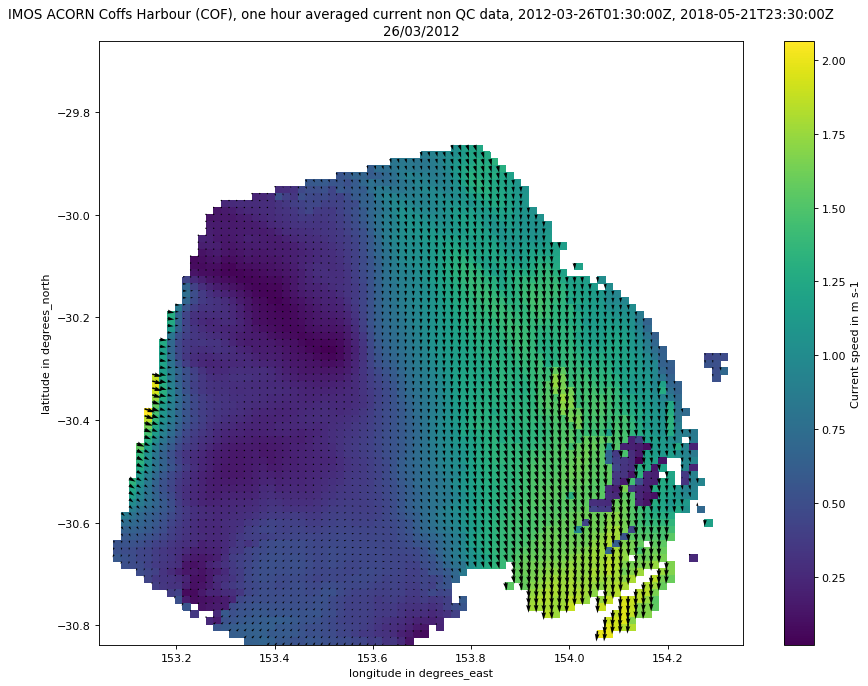

In [19]:
%matplotlib inline
from netCDF4 import Dataset
from netCDF4 import num2date
from matplotlib.pyplot import figure, pcolor, colorbar, xlabel, ylabel, title, draw, quiver, show
import numpy as np

acorn_URL = "/media/z3525831/Transcend/UNSW/Data HF radar/output.nc"

acorn_DATA = Dataset(acorn_URL) 
units = acorn_DATA.variables['TIME'].units
calendar = acorn_DATA.variables['TIME'].calendar
times = num2date(acorn_DATA.variables['TIME'][:], units=units, calendar=calendar)


uData = acorn_DATA.variables['UCUR'][:,:,:] # 3 dimensions - t,x,y
vData = acorn_DATA.variables['VCUR'][:,:,:]
spData = (uData**2 + vData**2)**0.5 
LAT = acorn_DATA.variables['LATITUDE']
LON = acorn_DATA.variables['LONGITUDE']
TIME = acorn_DATA.variables['TIME']


timeIndex = 4
speedData = spData[timeIndex,:,:]
latData = LAT[:]
lonData = LON[:]

uData = acorn_DATA.variables['UCUR'][timeIndex,:,:]
vData = acorn_DATA.variables['VCUR'][timeIndex,:,:]
units = acorn_DATA.variables['UCUR'].units


figure1 = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
pcolor(lonData , latData, speedData) 
cbar = colorbar()
cbar.ax.set_ylabel('Current speed in ' + units)
title(acorn_DATA.title + '\n' + num2date(TIME[timeIndex], TIME.units, TIME.calendar).strftime('%d/%m/%Y'))
xlabel(LON.long_name + ' in ' + LON.units)
ylabel(LAT.long_name + ' in ' + LAT.units)


Q = quiver(lonData[:], latData[:], uData, vData, units='width')                                                     
show()